In [1]:
from matplotlib import pyplot as plt, patches, gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

## Maps of region of interest

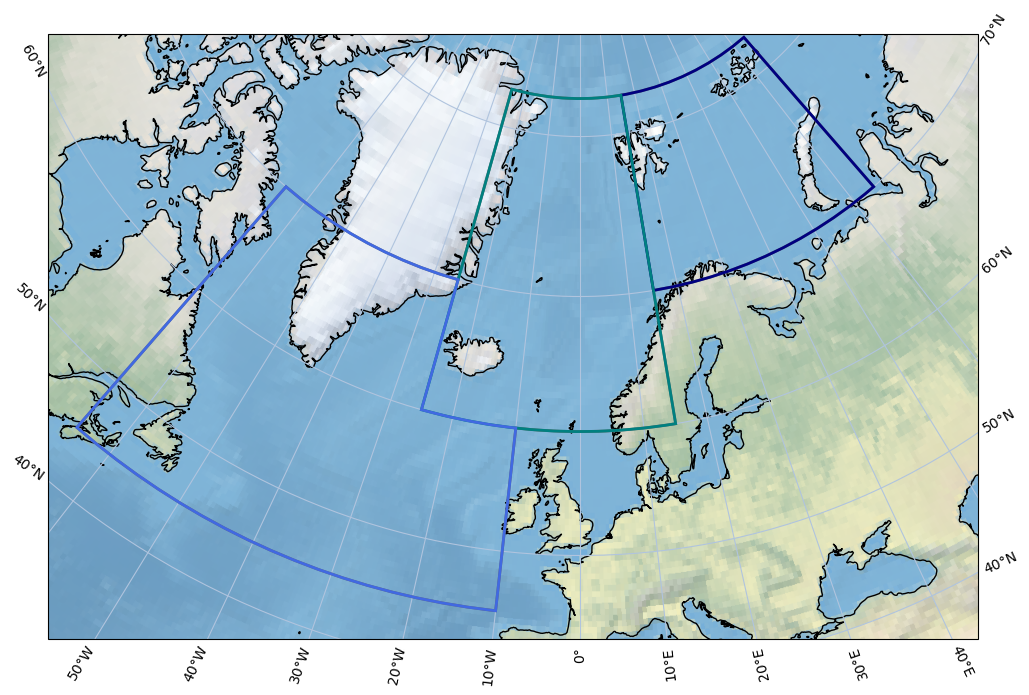

In [37]:
fig = plt.figure(figsize=[12,8])

map_proj = ccrs.LambertConformal(central_longitude=0)
map_proj._threshold /= 100

ax = plt.axes(projection=map_proj)
ax.set_extent([-67,48,43,82], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

gl = ax.gridlines(draw_labels=True, color = 'lightsteelblue',  xlocs = [x for x in range(-60,70,10)], \
                  ylocs = [y for y in range(40,90,10)], x_inline=False, y_inline=False, zorder=1)
gl.top_labels = False

aoi_corners = [[-65,45],[-10,45],[-10,60],[15,60],[15,70],[65,70],[65,82],[-25,82], [-25,70],[-65,70],[-65,45]]
aoi = patches.Polygon(xy=aoi_corners, edgecolor='dimgrey', facecolor='none', linewidth=2, transform=ccrs.PlateCarree(), zorder=2)
ax.add_patch(aoi)

gin_corners = [[-25,60],[15,60],[15,82],[-25,82],[-25,60]]
barents_corners = [[15,70],[65,70],[65,82],[15,82],[15,70]]
labrador_corners = [[-65,45],[-10,45],[-10,60],[-25,60],[-25,70],[-65,70],[-65,45]]

# Barents Sea subregion
barents_box = patches.Polygon(xy=barents_corners, edgecolor='navy', fc='none', lw=2, ls='-', transform=ccrs.PlateCarree(), zorder=3)
ax.add_patch(barents_box)

# Greenland-Iceland-Norwegian Seas subregion
gin_box = patches.Polygon(xy=gin_corners, edgecolor='teal', fc='none', lw=2, ls='-', transform=ccrs.PlateCarree(), zorder=4)
ax.add_patch(gin_box)

# Labrador Sea subregion
labrador_box = patches.Polygon(xy=labrador_corners, edgecolor='royalblue', fc='none', lw=2, ls='-', transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(labrador_box)





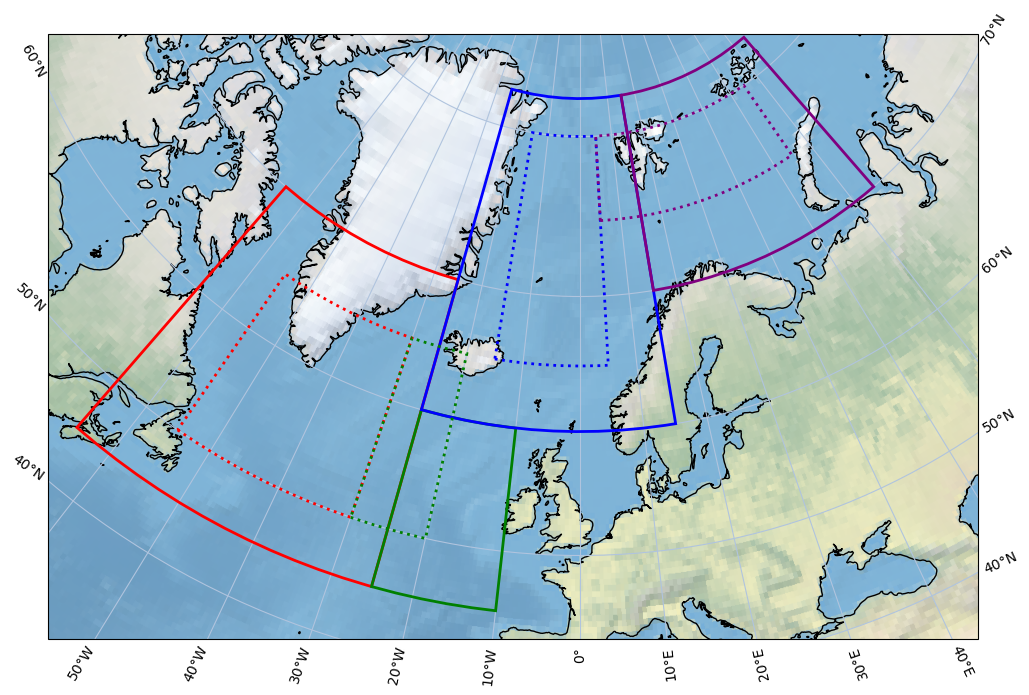

In [34]:
fig = plt.figure(figsize=[12,8])

map_proj = ccrs.LambertConformal(central_longitude=0)
map_proj._threshold /= 100

ax = plt.axes(projection=map_proj)
ax.set_extent([-67,48,43,82], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

gl = ax.gridlines(draw_labels=True, color = 'lightsteelblue',  xlocs = [x for x in range(-60,70,10)], \
                  ylocs = [y for y in range(40,90,10)], x_inline=False, y_inline=False, zorder=1)
gl.top_labels = False

bb1_corners = [[-65,45],[-25,45],[-25,70],[-65,70],[-65,45]] # Labrador Sea West
bb2_corners = [[-25,45],[-10,45],[-10,60],[-25,60],[-25,45]] # Labrador Sea East
bb3_corners = [[-25,60],[15,60],[15,82],[-25,82],[-25,60]] # GIN Seas
bb4_corners = [[15,70],[65,70],[65,82],[15,82],[15,70]] # Barents Sea

edgecolors=['red', 'green', 'blue', 'purple']

for bb_corners, color in zip([bb1_corners, bb2_corners, bb3_corners, bb4_corners], edgecolors):
    bb = patches.Polygon(xy=bb_corners, edgecolor= color, fc='none', lw=2, ls='-', transform=ccrs.PlateCarree(), zorder=3)
    ax.add_patch(bb)


buffered_bb1_corners = [[-55,50],[-30,50],[-30,65],[-55,65],[-55,50]] # Labrador Sea West
buffered_bb2_corners = [[-30,50],[-20,50],[-20,65],[-30,65],[-30,50]] # Labrador Sea East
buffered_bb3_corners = [[-15,65],[5,65],[5,80],[-15,80],[-15,65]] # GIN Seas
buffered_bb4_corners = [[5,75],[55,75],[55,80],[5,80],[5,75]] # Barents Sea

for bb_corners, color in zip([buffered_bb1_corners, buffered_bb2_corners, buffered_bb3_corners, buffered_bb4_corners], edgecolors):
    bb = patches.Polygon(xy=bb_corners, edgecolor= color, fc='none', lw=2, ls=':', transform=ccrs.PlateCarree(), zorder=3)
    ax.add_patch(bb)

In [13]:
plt.rcParams['axes.prop_cycle']

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


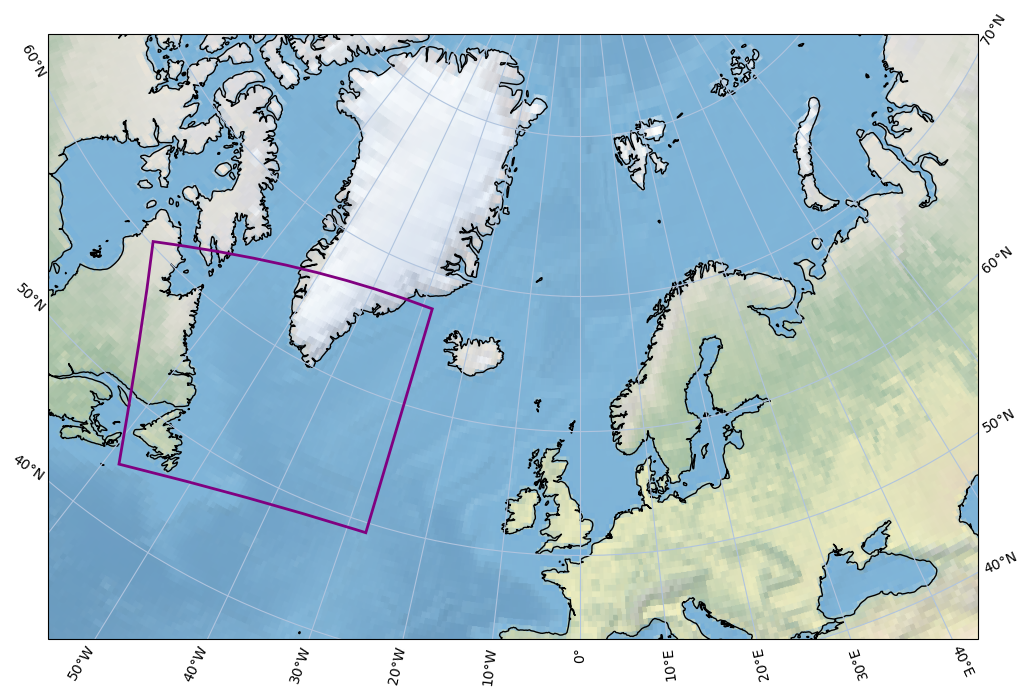

In [4]:
fig = plt.figure(figsize=[12,8])

map_proj = ccrs.LambertConformal(central_longitude=0)
map_proj._threshold /= 100

ax = plt.axes(projection=map_proj)
ax.set_extent([-67,48,43,82], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

gl = ax.gridlines(draw_labels=True, color = 'lightsteelblue',  xlocs = [x for x in range(-60,70,10)], \
                  ylocs = [y for y in range(40,90,10)], x_inline=False, y_inline=False, zorder=1)
gl.top_labels = False

# Example polygon from MODIS granule info
polygon = '67.495375 -28.18303 60.232009 -75.100066 44.820723 -58.396863 49.181452 -27.550534 67.495375 -28.18303'
polygon = polygon.split()
polygon = [float(x) for x in polygon]
polygon = [(polygon[i+1], polygon[i]) for i in range(0, len(polygon), 2)] # need to swap lat/lon

polygon_patch = patches.Polygon(xy=polygon, edgecolor='purple', facecolor='none', 
                                linewidth=2, transform=ccrs.Geodetic(), zorder=2) # ? Projection
ax.add_patch(polygon_patch)


In [5]:
# Poltgons for one day's worth of MODIS granules

polygons = ['62.701894 20.645219 56.888587 62.600547 69.265475 93.384348 80.776895 11.079099 62.701894 20.645219',
 '80.360472 13.960098 68.877821 93.702143 69.173032 146.386309 80.538654 -131.883933 80.360472 13.960098',
 '48.878056 44.912723 44.689877 75.786627 60.39481 91.583795 67.160205 44.255483 48.878056 44.912723',
 '66.670594 45.105119 60.081395 92.158707 70.638846 129.299635 84.446975 23.933265 66.670594 45.105119',
 '70.629357 69.209243 63.052294 122.718943 71.241588 166.356611 87.109212 5.837132 70.629357 69.209243',
 '82.953286 -30.803906 69.667017 -120.370827 58.5815 -85.811147 64.846505 -41.415666 82.953286 -30.803906',
 '65.32226 -42.39235 58.514522 -86.250366 42.804302 -71.002899 47.005119 -41.373433 65.32226 -42.39235',
 '47.355108 -41.852758 42.828844 -71.218032 25.718668 -63.00483 29.083026 -39.478961 47.355108 -41.852758',
 '82.360542 134.037909 69.691682 -137.153556 68.175887 -84.851073 78.534922 -11.049649 82.360542 134.037909',
 '79.104455 -12.534496 67.955178 -85.420141 55.260693 -56.756706 60.869197 -16.939512 79.104455 -12.534496',
 '61.318066 -17.746412 55.218148 -57.135056 39.057687 -44.117497 43.005353 -16.280522 61.318066 -17.746412',
 '85.958534 141.383497 70.700537 -100.775945 65.861032 -51.526599 74.631123 10.661454 85.958534 141.383497',
 '75.16902 9.384176 65.686757 -52.092449 51.793034 -28.40744 56.884423 7.721013 75.16902 9.384176',
 '57.306491 7.002137 51.77438 -28.732424 35.261994 -17.484584 39.000952 8.815947 57.306491 7.002137',
 '87.504548 95.748376 70.884696 -63.68196 63.126086 -19.773788 70.690339 33.838127 87.504548 95.748376',
 '71.200152 32.737289 63.00593 -20.27802 48.221316 -0.606186 52.89511 32.532465 71.200152 32.737289',
 '76.642128 -144.800447 66.970526 -77.528117 70.539492 -26.415667 84.067419 76.168335 76.642128 -144.800447',
 '84.703021 74.930926 70.252433 -26.868292 60.108785 10.712591 66.732837 57.742337 84.703021 74.930926',
 '67.217374 56.778663 60.019309 10.248747 44.567812 26.753399 48.904819 57.451957 67.217374 56.778663',
 '62.88106 -116.872383 57.052669 -74.749613 69.366666 -43.681344 80.954314 -126.75535 62.88106 -116.872383',
 '80.536614 -123.837129 68.953462 -43.335731 69.089863 9.333161 80.364601 90.347367 80.536614 -123.837129',
 '80.955878 88.762819 68.849922 8.783879 56.866465 40.156011 62.766843 82.05756 80.955878 88.762819',
 '31.140434 -94.539428 27.863139 -70.366605 44.991173 -62.15453 49.419858 -92.934739 31.140434 -94.539428',
 '48.966072 -92.582042 44.766845 -61.658431 60.45725 -45.798499 67.245031 -93.251749 48.966072 -92.582042',
 '66.757152 -92.412162 60.145466 -45.225678 70.676966 -7.684028 84.59624 -114.521304 66.757152 -92.412162',
 '84.299605 -108.698346 70.307104 -7.608677 67.022813 43.434775 76.504595 110.767224 84.299605 -108.698346',
 '77.060172 109.375859 66.836147 42.872411 53.471342 68.818501 58.795599 106.621163 77.060172 109.375859',
 '35.117304 -69.30049 31.703173 -44.062653 48.630532 -34.753951 53.406038 -68.012238 35.117304 -69.30049',
 '52.939504 -67.581377 48.388003 -34.227723 63.447313 -15.201364 71.198576 -69.392148 52.939504 -67.581377',
 '70.713711 -68.317957 63.113297 -14.651628 71.24874 29.395105 87.14952 -135.027891 70.713711 -68.317957',
 '87.333054 -122.159416 70.899687 29.229974 64.481556 75.908384 72.584938 133.356571 87.333054 -122.159416',
 '39.099361 -44.102462 35.514774 -17.580604 52.189137 -6.901332 57.395081 -43.201244 39.099361 -44.102462',
 '56.920036 -42.705776 51.933837 -6.369932 66.14145 16.702117 75.127803 -46.375693 56.920036 -42.705776',
 '74.671694 -44.641119 65.77708 17.211313 70.967719 66.674768 85.703731 -173.838228 74.671694 -44.641119',
 '43.084922 -18.954875 39.288576 9.112224 55.639797 21.519255 61.378828 -18.551962 43.084922 -18.954875',
 '60.893238 -17.942043 55.35838 22.087004 68.393521 50.22484 79.026847 -24.95218 60.893238 -17.942043',
 '78.590278 -22.601807 68.028329 50.588635 69.874263 103.121263 82.179975 -167.097614 78.590278 -22.601807',
 '47.066079 6.14558 43.011963 36.052906 58.946983 50.656758 65.353747 5.883726 47.066079 6.14558',
 '64.864765 6.634052 58.643159 51.234445 70.090214 85.402722 82.81669 -7.702864 64.864765 6.634052',
 '82.442352 -3.691023 69.725691 85.580978 68.087247 138.06121 78.360295 -148.694786 82.442352 -3.691023']

In [31]:
# Daylight only (1st January 2022)

polygons = ['65.32226 -42.39235 58.514522 -86.250366 42.804302 -71.002899 47.005119 -41.373433 65.32226 -42.39235',
 '47.355108 -41.852758 42.828844 -71.218032 25.718668 -63.00483 29.083026 -39.478961 47.355108 -41.852758',
 '61.318066 -17.746412 55.218148 -57.135056 39.057687 -44.117497 43.005353 -16.280522 61.318066 -17.746412',
 '57.306491 7.002137 51.77438 -28.732424 35.261994 -17.484584 39.000952 8.815947 57.306491 7.002137',
 '67.217374 56.778663 60.019309 10.248747 44.567812 26.753399 48.904819 57.451957 67.217374 56.778663']

In [2]:
#North Atlantic polygons

polygons = ['58.572999 -25.022957 52.863673 -61.735239 36.450516 -49.960015 40.259408 -23.265827 58.572999 -25.022957',
 '57.286156 -17.606495 51.747089 -53.232965 35.230387 -41.982387 38.975908 -15.751327 57.286156 -17.606495',
 '57.881684 -20.150211 52.267172 -56.26474 35.797013 -44.777044 39.569795 -18.339548 57.881684 -20.150211',
 '58.169255 -15.222073 52.517591 -51.582381 36.07003 -39.977463 39.856055 -13.435504 58.169255 -15.222073',
 '59.219052 -10.246831 53.423016 -47.536701 37.065828 -35.486109 40.905216 -8.547749 59.219052 -10.246831',
 '57.965929 -26.621551 52.336067 -62.83823 35.875598 -51.315025 39.655421 -24.825186 57.965929 -26.621551',
 '57.180954 -19.17057 51.652788 -54.744067 35.130494 -43.535002 38.872661 -17.316979 57.180954 -19.17057',
 '58.741998 -14.164259 53.006827 -51.072345 36.61341 -39.22747 40.432709 -12.43555 58.741998 -14.164259',
 '57.83519 -23.026087 52.223924 -59.167607 35.755173 -47.699859 39.527535 -21.230831 57.83519 -23.026087',
 '57.616594 -15.552275 52.03443 -51.513025 35.548985 -40.133989 39.310296 -13.741326 57.616594 -15.552275',
 '58.444969 -24.338694 52.753515 -60.997685 36.334521 -49.280678 40.136692 -22.592124 58.444969 -24.338694',
 '58.624962 -16.846564 52.910231 -53.659586 36.505544 -41.867349 40.315779 -15.114685 58.624962 -16.846564',
 '58.360753 -24.477165 52.68833 -61.042908 36.25846 -49.363959 40.050464 -22.723979 58.360753 -24.477165',
 '58.854054 -16.969799 53.114851 -53.963058 36.725189 -42.075092 40.541497 -15.255484 58.854054 -16.969799',
 '56.309242 -23.360326 50.896454 -58.24414 34.220826 -47.33568 37.912962 -21.43692 56.309242 -23.360326',
 '58.496835 -23.378586 52.80704 -60.0593 36.38789 -48.323365 40.185537 -21.636561 58.496835 -23.378586',
 '59.238635 -15.852172 53.445453 -53.192406 37.08965 -41.137654 40.925729 -14.171176 59.238635 -15.852172',
 '56.244964 -29.748513 50.841541 -64.590259 34.247033 -53.742372 37.939094 -27.839243 56.244964 -29.748513',
 '57.008606 -22.233172 51.510464 -57.679697 34.973637 -46.542632 38.701152 -20.378455 57.008606 -22.233172',
 '57.791939 -14.71349 52.191032 -50.803888 35.631205 -39.318532 39.393025 -12.901023 57.791939 -14.71349',
 '57.917456 -26.124062 52.295712 -62.359211 35.835046 -50.860357 39.611333 -24.344377 57.917456 -26.124062',
 '59.119806 -18.574129 53.334657 -55.856044 36.974104 -43.851047 40.810823 -16.891451 59.119806 -18.574129',
 '60.363157 -11.008577 54.399716 -49.438408 38.066321 -36.831825 41.962024 -9.419948 60.363157 -11.008577',
 '57.445474 -24.922725 51.887367 -60.766098 35.388176 -49.457044 39.139736 -23.108708 57.445474 -24.922725',
 '58.731335 -17.372356 53.00312 -54.309277 36.608984 -42.472819 40.423353 -15.659761 58.731335 -17.372356',
 '57.234661 -23.719648 51.704035 -59.387622 35.188439 -48.162046 38.929689 -21.889464 57.234661 -23.719648',
 '58.582079 -16.171505 52.871829 -52.970831 36.38084 -41.158158 40.184846 -14.428373 58.582079 -16.171505',
 '55.692838 -30.048041 50.349577 -64.505802 33.718952 -53.858674 37.391223 -28.107488 55.692838 -30.048041',
 '57.072638 -22.513264 51.56214 -58.042427 35.033518 -46.880469 38.767772 -20.669255 57.072638 -22.513264',
 '58.493088 -14.960934 52.798102 -51.676269 36.381834 -39.941079 40.183987 -13.225984 58.493088 -14.960934',
 '55.722248 -28.834306 50.377396 -63.309312 33.747658 -52.652474 37.419794 -26.896012 55.722248 -28.834306',
 '57.215355 -21.29482 51.688235 -56.934082 35.169458 -45.716986 38.909325 -19.460848 57.215355 -21.29482',
 '58.786041 -13.735683 53.052023 -50.695216 36.5745 -38.795951 40.385175 -12.006061 58.786041 -13.735683',
 '55.976526 -27.606967 50.603298 -62.268822 33.990843 -51.519557 37.672597 -25.684933 55.976526 -27.606967',
 '57.638142 -20.056203 52.059289 -56.037289 35.572822 -44.653358 39.330665 -18.253749 57.638142 -20.056203',
 '59.352924 -12.479536 53.543284 -49.946936 37.198371 -37.842598 41.040755 -10.815359 59.352924 -12.479536',
 '56.67502 -26.366986 51.219241 -61.566498 34.657108 -50.558162 38.368689 -24.494294 56.67502 -26.366986',
 '58.443166 -18.802754 52.756902 -55.460125 36.251182 -43.707999 40.044349 -17.046406 58.443166 -18.802754',
 '60.156497 -11.212382 54.228982 -49.419682 37.956036 -36.952514 41.842654 -9.616323 60.156497 -11.212382',
 '57.50711 -25.118554 51.944654 -60.982384 35.446679 -49.650564 39.198868 -23.303761 57.50711 -25.118554',
 '59.366317 -17.53385 53.553041 -55.007326 37.209754 -42.897273 41.054558 -15.868484 59.366317 -17.53385',
 '58.680636 -23.84285 52.963907 -60.69999 36.47592 -48.847032 40.27914 -22.104642 58.680636 -23.84285',
 '58.013242 -30.136449 52.387616 -66.425096 35.929146 -54.88977 39.703283 -28.362931 58.013242 -30.136449',
 '57.081381 -21.510424 51.572371 -57.062677 35.044274 -45.89834 38.776259 -19.67454 57.081381 -21.510424',
 '59.609894 -13.886004 53.760675 -51.623616 37.442431 -39.405024 41.300134 -12.253749 59.609894 -13.886004',
 '57.103302 -27.770902 51.58928 -63.345124 35.063782 -52.171666 38.798725 -25.936333 57.103302 -27.770902',
 '56.66749 -20.33591 51.205371 -55.588369 34.649262 -44.582044 38.365827 -18.475516 56.66749 -20.33591',
 '59.460254 -12.703838 53.628354 -50.333414 37.299944 -38.181087 41.153052 -11.064746 59.460254 -12.703838',
 '57.123088 -26.580815 51.604827 -62.199984 35.083297 -51.019041 38.820489 -24.75489 57.123088 -26.580815',
 '58.143529 -19.084928 52.49537 -55.552269 36.054805 -43.965065 39.839485 -17.339483 58.143529 -19.084928',
 '57.210842 -19.180103 51.687125 -54.854519 35.169518 -43.642806 38.906898 -17.361146 57.210842 -19.180103',
 '60.358522 -11.512152 54.402075 -49.966256 38.150821 -37.407888 42.047462 -9.953903 60.358522 -11.512152',
 '58.134461 -25.405311 52.491307 -61.843837 36.046002 -50.260998 39.827423 -23.655646 58.134461 -25.405311',
 '56.964912 -19.239686 51.475096 -54.701092 34.935924 -43.585442 38.659442 -17.400717 56.964912 -19.239686',
 '60.226758 -11.569983 54.2926 -49.883423 38.028218 -37.387976 41.91576 -9.997698 60.226758 -11.569983',
 '58.037679 -25.4577 52.409852 -61.801044 35.954803 -50.258768 39.72952 -23.698857 58.037679 -25.4577']

In [13]:
# January 2022, buffered bounding boxes

polygons = ['57.330665 -45.39889 51.790442 -81.188299 35.283179 -69.928163 39.02683 -43.592112 57.330665 -45.39889',
 '71.220458 -19.671219 63.007539 -72.754861 48.23286 -53.062657 52.917941 -19.883032 71.220458 -19.671219',
 '53.310039 -20.522104 48.235362 -53.333169 31.446747 -43.493852 35.016553 -18.447637 53.310039 -20.522104',
 '67.229846 4.361253 60.018513 -42.208327 44.572509 -25.690912 48.918054 5.033973 67.229846 4.361253',
 '73.09267 79.782129 64.318905 22.961425 49.932088 44.43014 54.798855 78.959472 73.09267 79.782129',
 '72.882053 -57.81962 64.177898 -114.172777 49.743846 -92.91539 54.587564 -58.558319 72.882053 -57.81962',
 '54.994416 -59.24321 49.73549 -93.216968 33.057422 -82.820717 36.695903 -57.270208 54.994416 -59.24321',
 '68.902872 -34.14025 61.30327 -83.134916 46.115168 -65.382126 50.59185 -33.747557 68.902872 -34.14025',
 '50.970316 -34.293896 46.126469 -65.635124 29.200612 -56.493154 32.685007 -32.090875 50.970316 -34.293896',
 '64.903506 -9.759248 58.174866 -53.212331 42.414947 -38.220648 46.589802 -8.723292 64.903506 -9.759248',
 '60.894349 14.805463 54.856652 -24.175459 38.658019 -11.362944 42.58393 16.312021 60.894349 14.805463',
 '70.863072 65.241145 62.755508 12.790735 47.912487 32.165064 52.560189 65.11351 70.863072 65.241145',
 '66.667724 -48.309538 59.581275 -94.012347 44.055368 -77.88653 48.354561 -47.514798 66.667724 -48.309538',
 '62.664585 -23.778584 56.340608 -64.616704 40.321743 -50.90497 44.352026 -22.462312 62.664585 -23.778584',
 '58.651939 0.909319 52.939336 -35.988907 36.538713 -24.190222 40.345345 2.613768 58.651939 0.909319',
 '72.528674 27.030783 63.930298 -28.595871 49.419314 -7.682618 54.230799 26.416938 72.528674 27.030783',
 '60.426616 -37.727203 54.459873 -76.265162 38.216843 -63.674893 42.117173 -36.180722 60.426616 -37.727203',
 '56.411294 -12.95054 50.988036 -47.992503 34.409453 -37.086147 38.108635 -11.075023 56.411294 -12.95054',
 '70.307993 12.555596 62.349111 -38.885921 47.402671 -19.989812 52.00225 12.58234 70.307993 12.555596',
 '58.098872 -51.621863 52.458871 -88.048474 36.013324 -76.480688 39.794173 -49.874013 58.098872 -51.621863',
 '71.981887 -25.692932 63.551355 -80.204067 48.925267 -59.812837 53.680047 -26.121177 71.981887 -25.692932',
 '54.080333 -26.768616 48.923653 -60.097825 32.18422 -50.010566 35.784982 -24.739706 54.080333 -26.768616',
 '67.993772 -1.743615 60.613314 -49.432953 45.280749 -32.367025 49.682793 -1.212833 67.993772 -1.743615',
 '63.991989 22.616114 57.445134 -19.70777 41.572202 -5.262508 45.680726 23.772034 63.991989 22.616114',
 '69.765401 -40.244104 61.950801 -90.592532 46.907485 -72.153604 51.455309 -40.019491 69.765401 -40.244104',
 '51.839699 -40.550531 46.913498 -72.419578 30.036053 -63.028719 33.550765 -38.394405 51.839699 -40.550531',
 '65.768552 -15.915763 58.869805 -60.454273 43.221255 -44.921887 47.455815 -14.998306 65.768552 -15.915763',
 '61.763238 8.56896 55.589251 -31.245213 39.475852 -18.003861 43.450394 10.003794 61.763238 8.56896',
 '71.639143 59.221766 63.313075 5.341314 48.61816 25.412207 53.339249 58.879188 71.639143 59.221766',
 '67.541298 -54.338726 60.265124 -101.351505 44.783539 -84.564761 49.14149 -53.711453 67.541298 -54.338726',
 '63.542132 -29.950225 57.064226 -71.767125 41.060218 -57.528992 45.140445 -28.720956 63.542132 -29.950225',
 '59.528334 -5.304867 53.696089 -42.984333 37.368149 -30.803463 41.220813 -3.674105 59.528334 -5.304867',
 '69.421719 44.819146 61.706252 -5.086001 46.601569 13.068658 51.110965 45.053536 69.421719 44.819146',
 '61.223901 -43.968081 55.133144 -83.248524 38.96725 -70.276126 42.913173 -42.48319 61.223901 -43.968081',
 '57.210842 -19.180103 51.687125 -54.854519 35.169518 -43.642806 38.906898 -17.361146 57.210842 -19.180103',
 '71.098166 6.530249 62.924705 -46.325282 48.126062 -26.743502 52.795912 6.349366 71.098166 6.530249',
 '53.188281 5.706331 48.12859 -27.017696 31.329834 -17.216367 34.896258 7.788452 53.188281 5.706331',
 '67.109608 30.574952 59.931414 -15.811899 44.466971 0.618322 48.7983 31.26697 67.109608 30.574952',
 '58.996654 -57.840341 53.241237 -95.022136 36.868468 -83.080928 40.687575 -56.164078 58.996654 -57.840341',
 '54.978392 -33.014655 49.722403 -66.974911 33.042195 -56.584243 36.679917 -31.040921 54.978392 -33.014655',
 '68.886521 -7.820634 61.294199 -56.88264 46.101482 -39.140513 50.575626 -7.465739 68.886521 -7.820634',
 '50.952891 -8.071177 46.113507 -39.391118 29.184861 -30.254198 32.668281 -5.866074 50.952891 -8.071177',
 '64.888197 16.443509 58.165123 -26.962189 42.402053 -11.980707 46.574258 17.490075 64.888197 16.443509',
 '70.664908 -46.236042 62.609517 -98.166282 47.647212 -78.910079 52.267871 -46.228801 70.664908 -46.236042',
 '52.654882 -46.799977 47.649124 -79.181588 30.819692 -69.546718 34.363138 -44.688882 52.654882 -46.799977',
 '66.671944 -22.017515 59.583085 -67.788251 43.975339 -51.607011 48.270421 -21.233898 66.671944 -22.017515',
 '62.66701 2.444116 56.343085 -38.387659 40.240511 -24.629224 44.267861 3.77758 62.66701 2.444116',
 '72.53821 53.246153 63.947209 -2.357424 49.435405 18.558921 54.239552 52.636683 72.53821 53.246153',
 '68.362673 -60.435513 60.899057 -108.672995 45.623281 -91.336391 50.052133 -59.976216 68.362673 -60.435513',
 '64.366019 -36.112407 57.738855 -78.899783 41.912929 -64.231738 46.052444 -35.001796 64.366019 -36.112407',
 '60.358522 -11.512152 54.402075 -49.966256 38.150821 -37.407888 42.047462 -9.953903 60.358522 -11.512152',
 '56.340965 13.2706 50.926911 -21.706916 34.340968 -10.825619 38.039262 15.15399 56.340965 13.2706',
 '70.240508 38.77272 62.306636 -12.539026 47.34599 6.297542 51.933889 38.814798 70.240508 38.77272',
 '62.145512 -50.111126 55.909518 -90.37811 39.834933 -76.941378 43.832677 -48.735617 62.145512 -50.111126',
 '58.134461 -25.405311 52.491307 -61.843837 36.046002 -50.260998 39.827423 -23.655646 58.134461 -25.405311',
 '72.016047 0.557003 63.576292 -54.028541 48.957477 -33.606103 53.715361 0.113455 72.016047 0.557003',
 '54.114697 -0.549543 48.955833 -33.890657 32.216511 -23.791361 35.818371 1.48011 54.114697 -0.549543',
 '68.029159 24.471046 60.642389 -23.248254 45.313889 -6.156379 49.718191 25.003161 68.029159 24.471046',
 '55.822174 -39.244057 50.470416 -73.830541 33.84852 -63.141114 37.520799 -37.327354 55.822174 -39.244057',
 '69.816564 -13.861386 61.987038 -64.442975 46.872093 -45.900762 51.419639 -13.697621 69.816564 -13.861386',
 '51.800721 -14.324287 46.880991 -46.155091 29.99989 -36.775924 33.510743 -12.163823 51.800721 -14.324287',
 '65.819438 10.333207 58.911387 -34.284982 43.185087 -18.66717 47.420232 11.252343 65.819438 10.333207',
 '71.701121 85.462867 63.352954 31.46255 48.671948 51.591027 53.401286 85.104915 71.701121 85.462867',
 '71.507594 -52.126347 63.219922 -105.717463 48.497737 -85.768643 53.203902 -52.414456 71.507594 -52.126347',
 '53.597805 -53.053465 48.49475 -86.051799 31.723467 -76.121696 35.30307 -50.996126 53.597805 -53.053465',
 '67.520819 -28.12858 60.247923 -75.100764 44.843007 -58.378509 49.208561 -27.503928 67.520819 -28.12858',
 '63.520494 -3.729992 57.048982 -45.509085 41.124082 -31.329638 45.207282 -2.509358 63.520494 -3.729992',
 '59.509119 20.921007 53.682412 -16.724483 37.351935 -4.554782 41.202049 22.555222 59.509119 20.921007',
 '65.315934 -42.344768 58.506203 -86.211157 42.797151 -70.96645 46.999967 -41.327581 65.315934 -42.344768',
 '61.310017 -17.701623 55.208499 -57.094372 39.048582 -44.07952 42.99797 -16.236094 61.310017 -17.701623',
 '57.296645 7.045686 51.763245 -28.690738 35.251227 -17.445647 38.991701 8.859744 57.296645 7.045686',
 '71.187098 32.782899 62.992451 -20.227242 48.207175 -0.565732 52.882587 32.5779 71.187098 32.782899',
 '63.017389 -56.278295 56.638131 -97.490507 40.655434 -83.591153 44.703012 -55.002275 63.017389 -56.278295',
 '59.008441 -31.612204 53.24934 -68.811757 36.876287 -56.860912 40.699257 -29.935318 59.008441 -31.612204',
 '54.989477 -6.784256 49.737177 -40.74335 33.053858 -30.347729 36.691397 -4.810643 54.989477 -6.784256',
 '68.903036 18.379579 61.307195 -30.667332 46.116407 -12.914168 50.59225 18.746658 68.903036 18.379579',
 '56.795872 -45.471149 51.326559 -80.813076 34.776634 -69.762148 38.492611 -43.623497 56.795872 -45.471149',
 '70.695559 -19.880051 62.63494 -71.986726 47.756863 -52.758525 52.389076 -19.947071 70.695559 -19.880051',
 '52.777169 -20.578683 47.761105 -53.024527 30.937766 -43.353093 34.484228 -18.472469 52.777169 -20.578683',
 '66.704786 4.216216 59.613001 -41.591816 44.089623 -25.439707 48.391753 4.981494 66.704786 4.216216',
 '54.589376 -59.306206 49.378232 -92.97498 32.586049 -82.683861 36.201765 -57.29017 54.589376 -59.306206',
 '68.506442 -34.296211 61.007336 -82.633443 45.751986 -65.188495 50.192765 -33.814532 68.506442 -34.296211',
 '50.567213 -34.347461 45.763116 -65.437477 28.727649 -56.377287 32.192887 -32.106199 50.567213 -34.347461',
 '64.507189 -9.873276 57.856993 -52.816042 42.046708 -38.065726 46.193013 -8.778973 64.507189 -9.873276',
 '60.50024 14.71283 54.524855 -23.859438 38.28639 -11.236301 42.188935 16.261501 60.50024 14.71283',
 '70.389641 65.051787 62.41585 13.466015 47.482118 32.429952 52.083796 65.05119 70.389641 65.051787',
 '66.220292 -48.437808 59.23175 -93.509982 43.641283 -77.684495 47.90517 -47.567037 66.220292 -48.437808',
 '62.218275 -23.87427 55.97379 -64.209115 39.905242 -50.734679 43.904946 -22.505579 62.218275 -23.87427',
 '58.207811 0.835489 52.558701 -35.66068 36.118205 -24.049029 39.899993 2.577894 58.207811 0.835489',
 '60.019598 -37.807102 54.117045 -75.937928 37.83394 -63.537789 41.70929 -36.220487 60.019598 -37.807102',
 '56.005875 -13.014025 50.634548 -47.72772 34.024258 -36.972706 37.702954 -11.10871 56.005875 -13.014025',
 '69.910049 12.39435 62.061377 -38.33903 47.040897 -19.777122 51.601823 12.522761 69.910049 12.39435',
 '57.819365 -51.690802 52.218522 -87.863178 35.664183 -76.372229 39.424704 -49.90306 57.819365 -51.690802',
 '53.802944 -26.827347 48.678132 -59.951377 31.833743 -49.921651 35.417776 -24.763892 53.802944 -26.827347',
 '67.723184 -1.86184 60.407938 -49.122116 45.031083 -32.254994 49.409762 -1.273844 67.723184 -1.86184',
 '63.723195 22.523193 57.227246 -19.465515 41.319939 -5.175066 45.409413 23.717507 63.723195 22.523193',
 '69.441321 -40.374281 61.71148 -90.172939 46.609866 -71.996258 51.128839 -40.073667 69.441321 -40.374281',
 '51.51072 -40.601508 46.618983 -72.254896 29.72117 -62.960734 33.221921 -38.42648 51.51072 -40.601508',
 '65.446282 -16.028438 58.616479 -60.114771 42.922789 -44.78892 47.131232 -15.054722 65.446282 -16.028438',
 '61.442053 8.498584 55.323108 -30.974217 39.175439 -17.895868 43.128816 9.966114 61.442053 8.498584',
 '67.253207 -54.444718 60.047976 -101.021742 44.60078 -84.492267 48.938858 -53.77701 67.253207 -54.444718',
 '63.255066 -30.032984 56.834715 -71.504162 40.877068 -57.472909 44.940024 -28.781773 63.255066 -30.032984',
 '59.244892 -5.371926 53.456029 -42.777602 37.10068 -30.722809 40.936343 -3.714578 59.244892 -5.371926',
 '69.146036 44.699832 61.49915 -4.746687 46.346957 13.189745 50.83366 44.999325 69.146036 44.699832',
 '60.976094 -44.00698 54.92789 -83.05329 38.734568 -70.20227 42.663784 -42.505846 60.976094 -44.00698',
 '56.964912 -19.239686 51.475096 -54.701092 34.935924 -43.585442 38.659442 -17.400717 56.964912 -19.239686',
 '53.034577 5.652149 47.991338 -26.957247 31.097516 -17.172392 34.651706 7.760809 53.034577 5.652149',
 '66.960906 30.483005 59.817725 -15.666391 44.329143 0.659058 48.647609 31.207434 66.960906 30.483005',
 '58.784969 -57.901135 53.059982 -94.887483 36.667234 -83.036438 40.475352 -56.205479 58.784969 -57.901135',
 '54.769484 -33.067866 49.539651 -66.864988 32.842525 -56.546647 36.469336 -31.079374 54.769484 -33.067866',
 '68.682157 -7.91952 61.14394 -56.636469 45.91649 -39.054398 50.370719 -7.517866 68.682157 -7.91952',
 '50.746239 -8.117984 45.928376 -39.305742 28.985605 -30.226693 32.459976 -5.901399 50.746239 -8.117984',
 '64.68576 16.370612 58.005097 -26.770757 42.215471 -11.913919 46.37135 17.445952 64.68576 16.370612',
 '52.57145 -46.857365 47.574893 -79.172559 30.739344 -69.563981 34.279276 -44.739668 52.57145 -46.857365',
 '66.502286 -22.127948 59.45609 -67.615068 43.902371 -51.600399 48.186623 -21.315668 66.502286 -22.127948',
 '62.499073 2.378392 56.209329 -38.25501 40.168362 -24.631396 44.186353 3.717323 62.499073 2.378392',
 '64.232552 -36.179008 57.633597 -78.788683 41.789974 -64.200709 45.918203 -35.048218 64.232552 -36.179008',
 '60.226758 -11.569983 54.2926 -49.883423 38.028218 -37.387976 41.91576 -9.997698 60.226758 -11.569983',
 '56.209979 13.217903 50.815322 -21.645148 34.218086 -10.813124 37.909567 15.11166 56.209979 13.217903',
 '62.046851 -50.168763 55.830041 -90.316098 39.743116 -76.931401 43.732706 -48.780498 62.046851 -50.168763',
 '58.037679 -25.4577 52.409852 -61.801044 35.954803 -50.258768 39.72952 -23.698857 58.037679 -25.4577',
 '54.019781 -0.59509 48.873431 -33.862315 32.126276 -23.79505 35.722764 1.440534 54.019781 -0.59509',
 '67.938566 24.405611 60.576589 -23.163318 45.231413 -6.1385 49.625816 24.95698 67.938566 24.405611',
 '55.84922 -39.298062 50.494779 -73.894103 33.873446 -63.195378 37.546721 -37.38128 55.84922 -39.298062',
 '51.829806 -14.377981 46.907763 -46.216854 30.027134 -36.829724 33.53878 -12.217716 51.829806 -14.377981',
 '65.760816 10.276014 58.870598 -34.249156 43.21625 -18.720449 47.448511 11.191327 65.760816 10.276014',
 '53.568675 -53.098655 48.470974 -86.068257 31.695932 -76.147981 35.272394 -51.038957 53.568675 -53.098655',
 '67.495375 -28.18303 60.232009 -75.100066 44.820723 -58.396863 49.181452 -27.550534 67.495375 -28.18303',
 '63.497242 -3.780026 57.033224 -45.517709 41.102786 -31.351828 45.181823 -2.554482 63.497242 -3.780026',
 '59.48751 20.873564 53.666955 -16.740469 37.331668 -4.580459 41.178366 22.511006 59.48751 20.873564',
 '65.32226 -42.39235 58.514522 -86.250366 42.804302 -71.002899 47.005119 -41.373433 65.32226 -42.39235',
 '61.318066 -17.746412 55.218148 -57.135056 39.057687 -44.117497 43.005353 -16.280522 61.318066 -17.746412',
 '57.306491 7.002137 51.77438 -28.732424 35.261994 -17.484584 39.000952 8.815947 57.306491 7.002137']

In [15]:
# January 2022, original bounding boxes

polygons = ['57.330665 -45.39889 51.790442 -81.188299 35.283179 -69.928163 39.02683 -43.592112 57.330665 -45.39889',
 '71.220458 -19.671219 63.007539 -72.754861 48.23286 -53.062657 52.917941 -19.883032 71.220458 -19.671219',
 '53.310039 -20.522104 48.235362 -53.333169 31.446747 -43.493852 35.016553 -18.447637 53.310039 -20.522104',
 '67.229846 4.361253 60.018513 -42.208327 44.572509 -25.690912 48.918054 5.033973 67.229846 4.361253',
 '49.281645 4.456703 44.59175 -25.91952 27.576833 -17.231649 31.003601 6.743795 49.281645 4.456703',
 '63.227185 28.77987 56.804998 -12.682056 40.848837 1.335102 44.914916 30.03256 63.227185 28.77987',
 '73.09267 79.782129 64.318905 22.961425 49.932088 44.43014 54.798855 78.959472 73.09267 79.782129',
 '69.116976 103.522656 61.47401 54.076882 46.31921 71.999085 50.812465 103.818863 69.116976 103.522656',
 '72.882053 -57.81962 64.177898 -114.172777 49.743846 -92.91539 54.587564 -58.558319 72.882053 -57.81962',
 '54.994416 -59.24321 49.73549 -93.216968 33.057422 -82.820717 36.695903 -57.270208 54.994416 -59.24321',
 '68.902872 -34.14025 61.30327 -83.134916 46.115168 -65.382126 50.59185 -33.747557 68.902872 -34.14025',
 '50.970316 -34.293896 46.126469 -65.635124 29.200612 -56.493154 32.685007 -32.090875 50.970316 -34.293896',
 '64.903506 -9.759248 58.174866 -53.212331 42.414947 -38.220648 46.589802 -8.723292 64.903506 -9.759248',
 '46.938498 -9.264773 42.441711 -38.433493 25.313584 -30.315013 28.670926 -6.871867 46.938498 -9.264773',
 '60.894349 14.805463 54.856652 -24.175459 38.658019 -11.362944 42.58393 16.312021 60.894349 14.805463',
 '70.863072 65.241145 62.755508 12.790735 47.912487 32.165064 52.560189 65.11351 70.863072 65.241145',
 '66.874576 89.307358 59.747309 43.223147 44.248519 59.497 48.56937 90.03288 66.874576 89.307358',
 '66.667724 -48.309538 59.581275 -94.012347 44.055368 -77.88653 48.354561 -47.514798 66.667724 -48.309538',
 '48.717331 -48.037298 44.074128 -78.120369 27.031303 -69.57571 30.441229 -45.725503 48.717331 -48.037298',
 '62.664585 -23.778584 56.340608 -64.616704 40.321743 -50.90497 44.352026 -22.462312 62.664585 -23.778584',
 '58.651939 0.909319 52.939336 -35.988907 36.538713 -24.190222 40.345345 2.613768 58.651939 0.909319',
 '72.528674 27.030783 63.930298 -28.595871 49.419314 -7.682618 54.230799 26.416938 72.528674 27.030783',
 '68.546615 50.881777 61.035227 2.340292 45.78999 19.81895 50.237018 51.301256 68.546615 50.881777',
 '64.43344 -62.32108 57.796922 -105.200623 41.981019 -90.495282 46.121659 -61.226175 64.43344 -62.32108',
 '46.468439 -61.760249 42.008249 -90.705731 24.772855 -82.666619 28.111572 -59.331514 46.468439 -61.760249',
 '60.426616 -37.727203 54.459873 -76.265162 38.216843 -63.674893 42.117173 -36.180722 60.426616 -37.727203',
 '56.411294 -12.95054 50.988036 -47.992503 34.409453 -37.086147 38.108635 -11.075023 56.411294 -12.95054',
 '70.307993 12.555596 62.349111 -38.885921 47.402671 -19.989812 52.00225 12.58234 70.307993 12.555596',
 '52.387764 11.955387 47.409405 -20.249534 30.564248 -10.69641 34.097183 14.082425 52.387764 11.955387',
 '66.315715 36.699333 59.304824 -8.593661 43.729075 7.296442 48.003131 37.521773 66.315715 36.699333',
 '72.195593 111.92596 63.712693 56.968021 49.127564 77.559659 53.897613 111.408711 72.195593 111.92596',
 '58.098872 -51.621863 52.458871 -88.048474 36.013324 -76.480688 39.794173 -49.874013 58.098872 -51.621863',
 '71.981887 -25.692932 63.551355 -80.204067 48.925267 -59.812837 53.680047 -26.121177 71.981887 -25.692932',
 '54.080333 -26.768616 48.923653 -60.097825 32.18422 -50.010566 35.784982 -24.739706 54.080333 -26.768616',
 '67.993772 -1.743615 60.613314 -49.432953 45.280749 -32.367025 49.682793 -1.212833 67.993772 -1.743615',
 '50.053285 -1.803382 45.296355 -32.608702 28.318834 -23.717614 31.772241 0.445844 50.053285 -1.803382',
 '63.991989 22.616114 57.445134 -19.70777 41.572202 -5.262508 45.680726 23.772034 63.991989 22.616114',
 '69.970876 97.445654 62.105131 46.602719 47.016125 65.276057 51.579817 97.573395 69.970876 97.445654',
 '55.861113 -65.486659 50.503253 -100.093444 33.885921 -89.391084 37.560601 -63.569794 55.861113 -65.486659',
 '69.765401 -40.244104 61.950801 -90.592532 46.907485 -72.153604 51.455309 -40.019491 69.765401 -40.244104',
 '51.839699 -40.550531 46.913498 -72.419578 30.036053 -63.028719 33.550765 -38.394405 51.839699 -40.550531',
 '65.768552 -15.915763 58.869805 -60.454273 43.221255 -44.921887 47.455815 -14.998306 65.768552 -15.915763',
 '47.811646 -15.541085 43.24523 -45.142276 26.157167 -36.81986 29.538034 -13.186533 47.811646 -15.541085',
 '61.763238 8.56896 55.589251 -31.245213 39.475852 -18.003861 43.450394 10.003794 61.763238 8.56896',
 '71.639143 59.221766 63.313075 5.341314 48.61816 25.412207 53.339249 58.879188 71.639143 59.221766',
 '67.656127 83.198945 60.353245 35.98907 44.968809 52.811503 49.347975 83.785403 67.656127 83.198945',
 '67.541298 -54.338726 60.265124 -101.351505 44.783539 -84.564761 49.14149 -53.711453 67.541298 -54.338726',
 '49.506674 -54.302121 44.798018 -84.805174 27.793662 -76.05939 31.226258 -52.0273 49.506674 -54.302121',
 '63.542132 -29.950225 57.064226 -71.767125 41.060218 -57.528992 45.140445 -28.720956 63.542132 -29.950225',
 '45.476439 -29.247279 41.092164 -57.724176 23.899996 -49.930957 27.213524 -26.793366 45.476439 -29.247279',
 '59.528334 -5.304867 53.696089 -42.984333 37.368149 -30.803463 41.220813 -3.674105 59.528334 -5.304867',
 '55.515088 19.508622 50.205983 -14.81572 33.56237 -4.244693 37.210788 21.44649 55.515088 19.508622',
 '69.421719 44.819146 61.706252 -5.086001 46.601569 13.068658 51.110965 45.053536 69.421719 44.819146',
 '65.428732 69.056744 58.598455 24.928703 42.90498 40.245098 47.116537 70.012782 65.428732 69.056744',
 '61.223901 -43.968081 55.133144 -83.248524 38.96725 -70.276126 42.913173 -42.48319 61.223901 -43.968081',
 '57.210842 -19.180103 51.687125 -54.854519 35.169518 -43.642806 38.906898 -17.361146 57.210842 -19.180103',
 '71.098166 6.530249 62.924705 -46.325282 48.126062 -26.743502 52.795912 6.349366 71.098166 6.530249',
 '53.188281 5.706331 48.12859 -27.017696 31.329834 -17.216367 34.896258 7.788452 53.188281 5.706331',
 '67.109608 30.574952 59.931414 -15.811899 44.466971 0.618322 48.7983 31.26697 67.109608 30.574952',
 '58.996654 -57.840341 53.241237 -95.022136 36.868468 -83.080928 40.687575 -56.164078 58.996654 -57.840341',
 '54.978392 -33.014655 49.722403 -66.974911 33.042195 -56.584243 36.679917 -31.040921 54.978392 -33.014655',
 '68.886521 -7.820634 61.294199 -56.88264 46.101482 -39.140513 50.575626 -7.465739 68.886521 -7.820634',
 '50.952891 -8.071177 46.113507 -39.391118 29.184861 -30.254198 32.668281 -5.866074 50.952891 -8.071177',
 '64.888197 16.443509 58.165123 -26.962189 42.402053 -11.980707 46.574258 17.490075 64.888197 16.443509',
 '70.77346 91.414403 62.693536 39.164365 47.829576 58.462386 52.470578 91.326067 70.77346 91.414403',
 '70.664908 -46.236042 62.609517 -98.166282 47.647212 -78.910079 52.267871 -46.228801 70.664908 -46.236042',
 '52.654882 -46.799977 47.649124 -79.181588 30.819692 -69.546718 34.363138 -44.688882 52.654882 -46.799977',
 '66.671944 -22.017515 59.583085 -67.788251 43.975339 -51.607011 48.270421 -21.233898 66.671944 -22.017515',
 '48.629272 -21.807903 43.996635 -51.830013 26.947133 -43.307673 30.351561 -19.490357 48.629272 -21.807903',
 '62.66701 2.444116 56.343085 -38.387659 40.240511 -24.629224 44.267861 3.77758 62.66701 2.444116',
 '72.53821 53.246153 63.947209 -2.357424 49.435405 18.558921 54.239552 52.636683 72.53821 53.246153',
 '68.558103 77.118534 61.044119 28.549583 45.80058 46.038162 50.250516 77.532457 68.558103 77.118534',
 '68.362673 -60.435513 60.899057 -108.672995 45.623281 -91.336391 50.052133 -59.976216 68.362673 -60.435513',
 '50.423646 -60.567685 45.633266 -91.587114 28.676833 -82.597185 32.139643 -58.338069 50.423646 -60.567685',
 '64.366019 -36.112407 57.738855 -78.899783 41.912929 -64.231738 46.052444 -35.001796 64.366019 -36.112407',
 '46.395153 -35.531827 41.941801 -64.435085 24.789243 -56.440581 28.127981 -33.11578 46.395153 -35.531827',
 '60.358522 -11.512152 54.402075 -49.966256 38.150821 -37.407888 42.047462 -9.953903 60.358522 -11.512152',
 '56.340965 13.2706 50.926911 -21.706916 34.340968 -10.825619 38.039262 15.15399 56.340965 13.2706',
 '70.240508 38.77272 62.306636 -12.539026 47.34599 6.297542 51.933889 38.814798 70.240508 38.77272',
 '66.252779 62.894003 59.255932 17.716215 43.671807 33.563919 47.939993 63.737565 66.252779 62.894003',
 '62.145512 -50.111126 55.909518 -90.37811 39.834933 -76.941378 43.832677 -48.735617 62.145512 -50.111126',
 '58.134461 -25.405311 52.491307 -61.843837 36.046002 -50.260998 39.827423 -23.655646 58.134461 -25.405311',
 '72.016047 0.557003 63.576292 -54.028541 48.957477 -33.606103 53.715361 0.113455 72.016047 0.557003',
 '54.114697 -0.549543 48.955833 -33.890657 32.216511 -23.791361 35.818371 1.48011 54.114697 -0.549543',
 '68.029159 24.471046 60.642389 -23.248254 45.313889 -6.156379 49.718191 25.003161 68.029159 24.471046',
 '64.035286 48.841071 57.481371 6.483552 41.613622 20.949828 45.719922 49.994447 64.035286 48.841071',
 '59.837276 -64.057056 53.959923 -102.009398 37.661656 -89.692488 41.527399 -62.45044 59.837276 -64.057056',
 '55.822174 -39.244057 50.470416 -73.830541 33.84852 -63.141114 37.520799 -37.327354 55.822174 -39.244057',
 '69.816564 -13.861386 61.987038 -64.442975 46.872093 -45.900762 51.419639 -13.697621 69.816564 -13.861386',
 '51.800721 -14.324287 46.880991 -46.155091 29.99989 -36.775924 33.510743 -12.163823 51.800721 -14.324287',
 '65.819438 10.333207 58.911387 -34.284982 43.185087 -18.66717 47.420232 11.252343 65.819438 10.333207',
 '47.771753 10.662371 43.215095 -18.872402 26.122762 -10.561127 29.497115 13.025757 47.771753 10.662371',
 '61.818687 34.849663 55.634632 -5.067772 39.443777 8.244474 43.41783 36.277096 61.818687 34.849663',
 '71.701121 85.462867 63.352954 31.46255 48.671948 51.591027 53.401286 85.104915 71.701121 85.462867',
 '71.507594 -52.126347 63.219922 -105.717463 48.497737 -85.768643 53.203902 -52.414456 71.507594 -52.126347',
 '53.597805 -53.053465 48.49475 -86.051799 31.723467 -76.121696 35.30307 -50.996126 53.597805 -53.053465',
 '67.520819 -28.12858 60.247923 -75.100764 44.843007 -58.378509 49.208561 -27.503928 67.520819 -28.12858',
 '49.574191 -28.082096 44.860554 -58.611191 27.858106 -49.84771 31.292398 -25.808452 49.574191 -28.082096',
 '63.520494 -3.729992 57.048982 -45.509085 41.124082 -31.329638 45.207282 -2.509358 63.520494 -3.729992',
 '45.543391 -3.025925 41.155331 -31.526142 23.964175 -23.718196 27.279378 -0.573624 45.543391 -3.025925',
 '59.509119 20.921007 53.682412 -16.724483 37.351935 -4.554782 41.202049 22.555222 59.509119 20.921007',
 '69.406277 71.056806 61.686771 21.135406 46.580664 39.28808 51.098299 71.290077 69.406277 71.056806',
 '65.315934 -42.344768 58.506203 -86.211157 42.797151 -70.96645 46.999967 -41.327581 65.315934 -42.344768',
 '47.350015 -41.810748 42.822405 -71.179345 25.712813 -62.96654 29.078558 -39.436457 47.350015 -41.810748',
 '61.310017 -17.701623 55.208499 -57.094372 39.048582 -44.07952 42.99797 -16.236094 61.310017 -17.701623',
 '57.296645 7.045686 51.763245 -28.690738 35.251227 -17.445647 38.991701 8.859744 57.296645 7.045686',
 '71.187098 32.782899 62.992451 -20.227242 48.207175 -0.565732 52.882587 32.5779 71.187098 32.782899',
 '67.202157 56.822167 60.004009 10.299154 44.55161 26.794897 48.889767 57.496225 67.202157 56.822167',
 '63.017389 -56.278295 56.638131 -97.490507 40.655434 -83.591153 44.703012 -55.002275 63.017389 -56.278295',
 '45.038749 -55.516717 40.685573 -83.794949 23.475563 -76.094926 26.778297 -53.044819 45.038749 -55.516717',
 '59.008441 -31.612204 53.24934 -68.811757 36.876287 -56.860912 40.699257 -29.935318 59.008441 -31.612204',
 '54.989477 -6.784256 49.737177 -40.74335 33.053858 -30.347729 36.691397 -4.810643 54.989477 -6.784256',
 '68.903036 18.379579 61.307195 -30.667332 46.116407 -12.914168 50.59225 18.746658 68.903036 18.379579',
 '50.968443 18.156492 46.133264 -13.146228 29.204299 -4.00926 32.68001 20.36216 50.968443 18.156492',
 '64.99756 42.703317 58.25362 -0.849168 42.42159 14.245458 46.594528 43.742448 64.99756 42.703317',
 '56.795872 -45.471149 51.326559 -80.813076 34.776634 -69.762148 38.492611 -43.623497 56.795872 -45.471149',
 '70.695559 -19.880051 62.63494 -71.986726 47.756863 -52.758525 52.389076 -19.947071 70.695559 -19.880051',
 '52.777169 -20.578683 47.761105 -53.024527 30.937766 -43.353093 34.484228 -18.472469 52.777169 -20.578683',
 '66.704786 4.216216 59.613001 -41.591816 44.089623 -25.439707 48.391753 4.981494 66.704786 4.216216',
 '48.751172 4.412591 44.110352 -25.664464 27.06562 -17.112149 30.472665 6.725467 48.751172 4.412591',
 '62.703762 28.674736 56.375614 -12.186 40.359762 1.544188 44.390876 29.990311 62.703762 28.674736',
 '54.589376 -59.306206 49.378232 -92.97498 32.586049 -82.683861 36.201765 -57.29017 54.589376 -59.306206',
 '68.506442 -34.296211 61.007336 -82.633443 45.751986 -65.188495 50.192765 -33.814532 68.506442 -34.296211',
 '50.567213 -34.347461 45.763116 -65.437477 28.727649 -56.377287 32.192887 -32.106199 50.567213 -34.347461',
 '64.507189 -9.873276 57.856993 -52.816042 42.046708 -38.065726 46.193013 -8.778973 64.507189 -9.873276',
 '46.537868 -9.309691 42.07445 -38.271723 24.84011 -30.217179 28.180916 -6.881802 46.537868 -9.309691',
 '60.50024 14.71283 54.524855 -23.859438 38.28639 -11.236301 42.188935 16.261501 60.50024 14.71283',
 '70.389641 65.051787 62.41585 13.466015 47.482118 32.429952 52.083796 65.05119 70.389641 65.051787',
 '66.220292 -48.437808 59.23175 -93.509982 43.641283 -77.684495 47.90517 -47.567037 66.220292 -48.437808',
 '48.264578 -48.08114 43.662125 -77.913212 26.595261 -69.481682 29.988877 -45.747636 48.264578 -48.08114',
 '62.218275 -23.87427 55.97379 -64.209115 39.905242 -50.734679 43.904946 -22.505579 62.218275 -23.87427',
 '58.207811 0.835489 52.558701 -35.66068 36.118205 -24.049029 39.899993 2.577894 58.207811 0.835489',
 '68.111584 50.735692 60.707143 2.884431 45.39103 20.034402 49.800154 51.245509 68.111584 50.735692',
 '64.025622 -62.423496 57.467915 -104.79705 41.599973 -90.33129 45.711401 -61.272257 64.025622 -62.423496',
 '46.054555 -61.800426 41.62759 -90.541853 24.45962 -82.624081 27.788474 -59.37106 46.054555 -61.800426',
 '60.019598 -37.807102 54.117045 -75.937928 37.83394 -63.537789 41.70929 -36.220487 60.019598 -37.807102',
 '56.005875 -13.014025 50.634548 -47.72772 34.024258 -36.972706 37.702954 -11.10871 56.005875 -13.014025',
 '69.910049 12.39435 62.061377 -38.33903 47.040897 -19.777122 51.601823 12.522761 69.910049 12.39435',
 '51.98444 11.902502 47.048931 -20.034058 30.177359 -10.602099 33.693079 14.053154 51.98444 11.902502',
 '65.918606 36.583879 58.993043 -8.159875 43.361726 7.468377 47.605224 37.471853 65.918606 36.583879',
 '57.819365 -51.690802 52.218522 -87.863178 35.664183 -76.372229 39.424704 -49.90306 57.819365 -51.690802',
 '53.802944 -26.827347 48.678132 -59.951377 31.833743 -49.921651 35.417776 -24.763892 53.802944 -26.827347',
 '67.723184 -1.86184 60.407938 -49.122116 45.031083 -32.254994 49.409762 -1.273844 67.723184 -1.86184',
 '49.777712 -1.856279 45.047177 -32.49128 27.968469 -23.644128 31.407666 0.424523 49.777712 -1.856279',
 '63.723195 22.523193 57.227246 -19.465515 41.319939 -5.175066 45.409413 23.717507 63.723195 22.523193',
 '69.622332 97.273184 61.853557 47.072852 46.78105 65.398597 51.315132 97.486072 69.622332 97.273184',
 '55.530742 -65.545748 50.214809 -99.889352 33.571577 -89.30688 37.229279 -63.605104 55.530742 -65.545748',
 '69.441321 -40.374281 61.71148 -90.172939 46.609866 -71.996258 51.128839 -40.073667 69.441321 -40.374281',
 '51.51072 -40.601508 46.618983 -72.254896 29.72117 -62.960734 33.221921 -38.42648 51.51072 -40.601508',
 '65.446282 -16.028438 58.616479 -60.114771 42.922789 -44.78892 47.131232 -15.054722 65.446282 -16.028438',
 '47.484207 -15.583647 42.947088 -45.008632 25.841872 -36.76464 29.211258 -13.213957 47.484207 -15.583647',
 '61.442053 8.498584 55.323108 -30.974217 39.175439 -17.895868 43.128816 9.966114 61.442053 8.498584',
 '67.346139 83.086769 60.116413 36.351935 44.68416 52.950002 49.035201 83.733552 67.346139 83.086769',
 '67.253207 -54.444718 60.047976 -101.021742 44.60078 -84.492267 48.938858 -53.77701 67.253207 -54.444718',
 '49.305198 -54.357943 44.615076 -84.737334 27.599736 -76.044709 31.025277 -52.071813 49.305198 -54.357943',
 '63.255066 -30.032984 56.834715 -71.504162 40.877068 -57.472909 44.940024 -28.781773 63.255066 -30.032984',
 '45.277505 -29.297981 40.908641 -57.673781 23.707034 -49.923664 27.014737 -26.834823 45.277505 -29.297981',
 '59.244892 -5.371926 53.456029 -42.777602 37.10068 -30.722809 40.936343 -3.714578 59.244892 -5.371926',
 '55.233436 19.451696 49.961613 -14.645406 33.295091 -4.175331 36.928636 21.409663 55.233436 19.451696',
 '69.146036 44.699832 61.49915 -4.746687 46.346957 13.189745 50.83366 44.999325 69.146036 44.699832',
 '65.154456 68.965352 58.381999 25.206794 42.651735 40.350053 46.841752 69.964377 65.154456 68.965352',
 '60.976094 -44.00698 54.92789 -83.05329 38.734568 -70.20227 42.663784 -42.505846 60.976094 -44.00698',
 '56.964912 -19.239686 51.475096 -54.701092 34.935924 -43.585442 38.659442 -17.400717 56.964912 -19.239686',
 '53.034577 5.652149 47.991338 -26.957247 31.097516 -17.172392 34.651706 7.760809 53.034577 5.652149',
 '66.960906 30.483005 59.817725 -15.666391 44.329143 0.659058 48.647609 31.207434 66.960906 30.483005',
 '58.784969 -57.901135 53.059982 -94.887483 36.667234 -83.036438 40.475352 -56.205479 58.784969 -57.901135',
 '54.769484 -33.067866 49.539651 -66.864988 32.842525 -56.546647 36.469336 -31.079374 54.769484 -33.067866',
 '68.682157 -7.91952 61.14394 -56.636469 45.91649 -39.054398 50.370719 -7.517866 68.682157 -7.91952',
 '50.746239 -8.117984 45.928376 -39.305742 28.985605 -30.226693 32.459976 -5.901399 50.746239 -8.117984',
 '64.68576 16.370612 58.005097 -26.770757 42.215471 -11.913919 46.37135 17.445952 64.68576 16.370612',
 '52.57145 -46.857365 47.574893 -79.172559 30.739344 -69.563981 34.279276 -44.739668 52.57145 -46.857365',
 '66.502286 -22.127948 59.45609 -67.615068 43.902371 -51.600399 48.186623 -21.315668 66.502286 -22.127948',
 '48.547766 -21.861648 43.922618 -51.830804 26.868544 -43.329519 30.270091 -19.539216 48.547766 -21.861648',
 '62.499073 2.378392 56.209329 -38.25501 40.168362 -24.631396 44.186353 3.717323 62.499073 2.378392',
 '68.400451 77.032509 60.928172 28.726718 45.656519 46.095627 50.091067 77.482123 68.400451 77.032509',
 '68.227835 -60.515839 60.798522 -108.530631 45.499168 -91.295132 49.915491 -60.025982 68.227835 -60.515839',
 '50.285777 -60.613288 45.510136 -91.54379 28.545043 -82.592103 32.001347 -58.376189 50.285777 -60.613288',
 '64.232552 -36.179008 57.633597 -78.788683 41.789974 -64.200709 45.918203 -35.048218 64.232552 -36.179008',
 '46.259671 -35.57427 41.8187 -64.404696 24.658399 -56.440892 27.991541 -33.152107 46.259671 -35.57427',
 '60.226758 -11.569983 54.2926 -49.883423 38.028218 -37.387976 41.91576 -9.997698 60.226758 -11.569983',
 '56.209979 13.217903 50.815322 -21.645148 34.218086 -10.813124 37.909567 15.11166 56.209979 13.217903',
 '66.219595 62.830614 59.2314 17.715111 43.640339 33.539936 47.905172 63.683395 66.219595 62.830614',
 '62.046851 -50.168763 55.830041 -90.316098 39.743116 -76.931401 43.732706 -48.780498 62.046851 -50.168763',
 '58.037679 -25.4577 52.409852 -61.801044 35.954803 -50.258768 39.72952 -23.698857 58.037679 -25.4577',
 '54.019781 -0.59509 48.873431 -33.862315 32.126276 -23.79505 35.722764 1.440534 54.019781 -0.59509',
 '67.938566 24.405611 60.576589 -23.163318 45.231413 -6.1385 49.625816 24.95698 67.938566 24.405611',
 '63.946119 48.782522 57.409959 6.538756 41.530004 20.954075 45.629672 49.949236 63.946119 48.782522',
 '59.862309 -64.113381 53.982331 -102.073278 37.684483 -89.745747 41.551047 -62.505729 59.862309 -64.113381',
 '55.84922 -39.298062 50.494779 -73.894103 33.873446 -63.195378 37.546721 -37.38128 55.84922 -39.298062',
 '51.829806 -14.377981 46.907763 -46.216854 30.027134 -36.829724 33.53878 -12.217716 51.829806 -14.377981',
 '65.760816 10.276014 58.870598 -34.249156 43.21625 -18.720449 47.448511 11.191327 65.760816 10.276014',
 '47.803114 10.600321 43.244405 -18.933226 26.152337 -10.614875 29.527145 12.965286 47.803114 10.600321',
 '61.761615 34.800348 55.592617 -5.047397 39.476435 8.191644 43.448308 36.218598 61.761615 34.800348',
 '53.568675 -53.098655 48.470974 -86.068257 31.695932 -76.147981 35.272394 -51.038957 53.568675 -53.098655',
 '67.495375 -28.18303 60.232009 -75.100066 44.820723 -58.396863 49.181452 -27.550534 67.495375 -28.18303',
 '49.546889 -28.125044 44.837521 -58.631989 27.832513 -49.876352 31.264318 -25.850057 49.546889 -28.125044',
 '63.497242 -3.780026 57.033224 -45.517709 41.102786 -31.351828 45.181823 -2.554482 63.497242 -3.780026',
 '45.517761 -3.0682 41.133306 -31.550642 23.940807 -23.749054 27.253811 -0.615064 45.517761 -3.0682',
 '59.48751 20.873564 53.666955 -16.740469 37.331668 -4.580459 41.178366 22.511006 59.48751 20.873564',
 '65.32226 -42.39235 58.514522 -86.250366 42.804302 -71.002899 47.005119 -41.373433 65.32226 -42.39235',
 '47.355108 -41.852758 42.828844 -71.218032 25.718668 -63.00483 29.083026 -39.478961 47.355108 -41.852758',
 '61.318066 -17.746412 55.218148 -57.135056 39.057687 -44.117497 43.005353 -16.280522 61.318066 -17.746412',
 '57.306491 7.002137 51.77438 -28.732424 35.261994 -17.484584 39.000952 8.815947 57.306491 7.002137',
 '67.217374 56.778663 60.019309 10.248747 44.567812 26.753399 48.904819 57.451957 67.217374 56.778663']

In [21]:
# January 2022, wider buffers
polygons = ['57.330665 -45.39889 51.790442 -81.188299 35.283179 -69.928163 39.02683 -43.592112 57.330665 -45.39889',
 '71.220458 -19.671219 63.007539 -72.754861 48.23286 -53.062657 52.917941 -19.883032 71.220458 -19.671219',
 '53.310039 -20.522104 48.235362 -53.333169 31.446747 -43.493852 35.016553 -18.447637 53.310039 -20.522104',
 '67.229846 4.361253 60.018513 -42.208327 44.572509 -25.690912 48.918054 5.033973 67.229846 4.361253',
 '73.09267 79.782129 64.318905 22.961425 49.932088 44.43014 54.798855 78.959472 73.09267 79.782129',
 '68.902872 -34.14025 61.30327 -83.134916 46.115168 -65.382126 50.59185 -33.747557 68.902872 -34.14025',
 '50.970316 -34.293896 46.126469 -65.635124 29.200612 -56.493154 32.685007 -32.090875 50.970316 -34.293896',
 '64.903506 -9.759248 58.174866 -53.212331 42.414947 -38.220648 46.589802 -8.723292 64.903506 -9.759248',
 '60.894349 14.805463 54.856652 -24.175459 38.658019 -11.362944 42.58393 16.312021 60.894349 14.805463',
 '70.863072 65.241145 62.755508 12.790735 47.912487 32.165064 52.560189 65.11351 70.863072 65.241145',
 '66.667724 -48.309538 59.581275 -94.012347 44.055368 -77.88653 48.354561 -47.514798 66.667724 -48.309538',
 '62.664585 -23.778584 56.340608 -64.616704 40.321743 -50.90497 44.352026 -22.462312 62.664585 -23.778584',
 '58.651939 0.909319 52.939336 -35.988907 36.538713 -24.190222 40.345345 2.613768 58.651939 0.909319',
 '72.528674 27.030783 63.930298 -28.595871 49.419314 -7.682618 54.230799 26.416938 72.528674 27.030783',
 '60.426616 -37.727203 54.459873 -76.265162 38.216843 -63.674893 42.117173 -36.180722 60.426616 -37.727203',
 '56.411294 -12.95054 50.988036 -47.992503 34.409453 -37.086147 38.108635 -11.075023 56.411294 -12.95054',
 '70.307993 12.555596 62.349111 -38.885921 47.402671 -19.989812 52.00225 12.58234 70.307993 12.555596',
 '58.098872 -51.621863 52.458871 -88.048474 36.013324 -76.480688 39.794173 -49.874013 58.098872 -51.621863',
 '71.981887 -25.692932 63.551355 -80.204067 48.925267 -59.812837 53.680047 -26.121177 71.981887 -25.692932',
 '54.080333 -26.768616 48.923653 -60.097825 32.18422 -50.010566 35.784982 -24.739706 54.080333 -26.768616',
 '67.993772 -1.743615 60.613314 -49.432953 45.280749 -32.367025 49.682793 -1.212833 67.993772 -1.743615',
 '69.765401 -40.244104 61.950801 -90.592532 46.907485 -72.153604 51.455309 -40.019491 69.765401 -40.244104',
 '51.839699 -40.550531 46.913498 -72.419578 30.036053 -63.028719 33.550765 -38.394405 51.839699 -40.550531',
 '65.768552 -15.915763 58.869805 -60.454273 43.221255 -44.921887 47.455815 -14.998306 65.768552 -15.915763',
 '61.763238 8.56896 55.589251 -31.245213 39.475852 -18.003861 43.450394 10.003794 61.763238 8.56896',
 '71.639143 59.221766 63.313075 5.341314 48.61816 25.412207 53.339249 58.879188 71.639143 59.221766',
 '67.541298 -54.338726 60.265124 -101.351505 44.783539 -84.564761 49.14149 -53.711453 67.541298 -54.338726',
 '63.542132 -29.950225 57.064226 -71.767125 41.060218 -57.528992 45.140445 -28.720956 63.542132 -29.950225',
 '59.528334 -5.304867 53.696089 -42.984333 37.368149 -30.803463 41.220813 -3.674105 59.528334 -5.304867',
 '69.421719 44.819146 61.706252 -5.086001 46.601569 13.068658 51.110965 45.053536 69.421719 44.819146',
 '61.223901 -43.968081 55.133144 -83.248524 38.96725 -70.276126 42.913173 -42.48319 61.223901 -43.968081',
 '57.210842 -19.180103 51.687125 -54.854519 35.169518 -43.642806 38.906898 -17.361146 57.210842 -19.180103',
 '71.098166 6.530249 62.924705 -46.325282 48.126062 -26.743502 52.795912 6.349366 71.098166 6.530249',
 '53.188281 5.706331 48.12859 -27.017696 31.329834 -17.216367 34.896258 7.788452 53.188281 5.706331',
 '67.109608 30.574952 59.931414 -15.811899 44.466971 0.618322 48.7983 31.26697 67.109608 30.574952',
 '54.978392 -33.014655 49.722403 -66.974911 33.042195 -56.584243 36.679917 -31.040921 54.978392 -33.014655',
 '68.886521 -7.820634 61.294199 -56.88264 46.101482 -39.140513 50.575626 -7.465739 68.886521 -7.820634',
 '50.952891 -8.071177 46.113507 -39.391118 29.184861 -30.254198 32.668281 -5.866074 50.952891 -8.071177',
 '64.888197 16.443509 58.165123 -26.962189 42.402053 -11.980707 46.574258 17.490075 64.888197 16.443509',
 '70.664908 -46.236042 62.609517 -98.166282 47.647212 -78.910079 52.267871 -46.228801 70.664908 -46.236042',
 '52.654882 -46.799977 47.649124 -79.181588 30.819692 -69.546718 34.363138 -44.688882 52.654882 -46.799977',
 '66.671944 -22.017515 59.583085 -67.788251 43.975339 -51.607011 48.270421 -21.233898 66.671944 -22.017515',
 '62.66701 2.444116 56.343085 -38.387659 40.240511 -24.629224 44.267861 3.77758 62.66701 2.444116',
 '72.53821 53.246153 63.947209 -2.357424 49.435405 18.558921 54.239552 52.636683 72.53821 53.246153',
 '64.366019 -36.112407 57.738855 -78.899783 41.912929 -64.231738 46.052444 -35.001796 64.366019 -36.112407',
 '60.358522 -11.512152 54.402075 -49.966256 38.150821 -37.407888 42.047462 -9.953903 60.358522 -11.512152',
 '56.340965 13.2706 50.926911 -21.706916 34.340968 -10.825619 38.039262 15.15399 56.340965 13.2706',
 '70.240508 38.77272 62.306636 -12.539026 47.34599 6.297542 51.933889 38.814798 70.240508 38.77272',
 '62.145512 -50.111126 55.909518 -90.37811 39.834933 -76.941378 43.832677 -48.735617 62.145512 -50.111126',
 '58.134461 -25.405311 52.491307 -61.843837 36.046002 -50.260998 39.827423 -23.655646 58.134461 -25.405311',
 '72.016047 0.557003 63.576292 -54.028541 48.957477 -33.606103 53.715361 0.113455 72.016047 0.557003',
 '54.114697 -0.549543 48.955833 -33.890657 32.216511 -23.791361 35.818371 1.48011 54.114697 -0.549543',
 '68.029159 24.471046 60.642389 -23.248254 45.313889 -6.156379 49.718191 25.003161 68.029159 24.471046',
 '55.822174 -39.244057 50.470416 -73.830541 33.84852 -63.141114 37.520799 -37.327354 55.822174 -39.244057',
 '69.816564 -13.861386 61.987038 -64.442975 46.872093 -45.900762 51.419639 -13.697621 69.816564 -13.861386',
 '51.800721 -14.324287 46.880991 -46.155091 29.99989 -36.775924 33.510743 -12.163823 51.800721 -14.324287',
 '65.819438 10.333207 58.911387 -34.284982 43.185087 -18.66717 47.420232 11.252343 65.819438 10.333207',
 '71.507594 -52.126347 63.219922 -105.717463 48.497737 -85.768643 53.203902 -52.414456 71.507594 -52.126347',
 '53.597805 -53.053465 48.49475 -86.051799 31.723467 -76.121696 35.30307 -50.996126 53.597805 -53.053465',
 '67.520819 -28.12858 60.247923 -75.100764 44.843007 -58.378509 49.208561 -27.503928 67.520819 -28.12858',
 '63.520494 -3.729992 57.048982 -45.509085 41.124082 -31.329638 45.207282 -2.509358 63.520494 -3.729992',
 '65.315934 -42.344768 58.506203 -86.211157 42.797151 -70.96645 46.999967 -41.327581 65.315934 -42.344768',
 '61.310017 -17.701623 55.208499 -57.094372 39.048582 -44.07952 42.99797 -16.236094 61.310017 -17.701623',
 '57.296645 7.045686 51.763245 -28.690738 35.251227 -17.445647 38.991701 8.859744 57.296645 7.045686',
 '71.187098 32.782899 62.992451 -20.227242 48.207175 -0.565732 52.882587 32.5779 71.187098 32.782899',
 '59.008441 -31.612204 53.24934 -68.811757 36.876287 -56.860912 40.699257 -29.935318 59.008441 -31.612204',
 '54.989477 -6.784256 49.737177 -40.74335 33.053858 -30.347729 36.691397 -4.810643 54.989477 -6.784256',
 '68.903036 18.379579 61.307195 -30.667332 46.116407 -12.914168 50.59225 18.746658 68.903036 18.379579',
 '56.795872 -45.471149 51.326559 -80.813076 34.776634 -69.762148 38.492611 -43.623497 56.795872 -45.471149',
 '70.695559 -19.880051 62.63494 -71.986726 47.756863 -52.758525 52.389076 -19.947071 70.695559 -19.880051',
 '52.777169 -20.578683 47.761105 -53.024527 30.937766 -43.353093 34.484228 -18.472469 52.777169 -20.578683',
 '66.704786 4.216216 59.613001 -41.591816 44.089623 -25.439707 48.391753 4.981494 66.704786 4.216216',
 '68.506442 -34.296211 61.007336 -82.633443 45.751986 -65.188495 50.192765 -33.814532 68.506442 -34.296211',
 '50.567213 -34.347461 45.763116 -65.437477 28.727649 -56.377287 32.192887 -32.106199 50.567213 -34.347461',
 '64.507189 -9.873276 57.856993 -52.816042 42.046708 -38.065726 46.193013 -8.778973 64.507189 -9.873276',
 '60.50024 14.71283 54.524855 -23.859438 38.28639 -11.236301 42.188935 16.261501 60.50024 14.71283',
 '70.389641 65.051787 62.41585 13.466015 47.482118 32.429952 52.083796 65.05119 70.389641 65.051787',
 '66.220292 -48.437808 59.23175 -93.509982 43.641283 -77.684495 47.90517 -47.567037 66.220292 -48.437808',
 '62.218275 -23.87427 55.97379 -64.209115 39.905242 -50.734679 43.904946 -22.505579 62.218275 -23.87427',
 '58.207811 0.835489 52.558701 -35.66068 36.118205 -24.049029 39.899993 2.577894 58.207811 0.835489',
 '60.019598 -37.807102 54.117045 -75.937928 37.83394 -63.537789 41.70929 -36.220487 60.019598 -37.807102',
 '56.005875 -13.014025 50.634548 -47.72772 34.024258 -36.972706 37.702954 -11.10871 56.005875 -13.014025',
 '69.910049 12.39435 62.061377 -38.33903 47.040897 -19.777122 51.601823 12.522761 69.910049 12.39435',
 '57.819365 -51.690802 52.218522 -87.863178 35.664183 -76.372229 39.424704 -49.90306 57.819365 -51.690802',
 '53.802944 -26.827347 48.678132 -59.951377 31.833743 -49.921651 35.417776 -24.763892 53.802944 -26.827347',
 '67.723184 -1.86184 60.407938 -49.122116 45.031083 -32.254994 49.409762 -1.273844 67.723184 -1.86184',
 '69.441321 -40.374281 61.71148 -90.172939 46.609866 -71.996258 51.128839 -40.073667 69.441321 -40.374281',
 '51.51072 -40.601508 46.618983 -72.254896 29.72117 -62.960734 33.221921 -38.42648 51.51072 -40.601508',
 '65.446282 -16.028438 58.616479 -60.114771 42.922789 -44.78892 47.131232 -15.054722 65.446282 -16.028438',
 '61.442053 8.498584 55.323108 -30.974217 39.175439 -17.895868 43.128816 9.966114 61.442053 8.498584',
 '67.253207 -54.444718 60.047976 -101.021742 44.60078 -84.492267 48.938858 -53.77701 67.253207 -54.444718',
 '63.255066 -30.032984 56.834715 -71.504162 40.877068 -57.472909 44.940024 -28.781773 63.255066 -30.032984',
 '59.244892 -5.371926 53.456029 -42.777602 37.10068 -30.722809 40.936343 -3.714578 59.244892 -5.371926',
 '60.976094 -44.00698 54.92789 -83.05329 38.734568 -70.20227 42.663784 -42.505846 60.976094 -44.00698',
 '56.964912 -19.239686 51.475096 -54.701092 34.935924 -43.585442 38.659442 -17.400717 56.964912 -19.239686',
 '66.960906 30.483005 59.817725 -15.666391 44.329143 0.659058 48.647609 31.207434 66.960906 30.483005',
 '54.769484 -33.067866 49.539651 -66.864988 32.842525 -56.546647 36.469336 -31.079374 54.769484 -33.067866',
 '68.682157 -7.91952 61.14394 -56.636469 45.91649 -39.054398 50.370719 -7.517866 68.682157 -7.91952',
 '50.746239 -8.117984 45.928376 -39.305742 28.985605 -30.226693 32.459976 -5.901399 50.746239 -8.117984',
 '64.68576 16.370612 58.005097 -26.770757 42.215471 -11.913919 46.37135 17.445952 64.68576 16.370612',
 '52.57145 -46.857365 47.574893 -79.172559 30.739344 -69.563981 34.279276 -44.739668 52.57145 -46.857365',
 '66.502286 -22.127948 59.45609 -67.615068 43.902371 -51.600399 48.186623 -21.315668 66.502286 -22.127948',
 '62.499073 2.378392 56.209329 -38.25501 40.168362 -24.631396 44.186353 3.717323 62.499073 2.378392',
 '64.232552 -36.179008 57.633597 -78.788683 41.789974 -64.200709 45.918203 -35.048218 64.232552 -36.179008',
 '60.226758 -11.569983 54.2926 -49.883423 38.028218 -37.387976 41.91576 -9.997698 60.226758 -11.569983',
 '56.209979 13.217903 50.815322 -21.645148 34.218086 -10.813124 37.909567 15.11166 56.209979 13.217903',
 '62.046851 -50.168763 55.830041 -90.316098 39.743116 -76.931401 43.732706 -48.780498 62.046851 -50.168763',
 '58.037679 -25.4577 52.409852 -61.801044 35.954803 -50.258768 39.72952 -23.698857 58.037679 -25.4577',
 '54.019781 -0.59509 48.873431 -33.862315 32.126276 -23.79505 35.722764 1.440534 54.019781 -0.59509',
 '67.938566 24.405611 60.576589 -23.163318 45.231413 -6.1385 49.625816 24.95698 67.938566 24.405611',
 '55.84922 -39.298062 50.494779 -73.894103 33.873446 -63.195378 37.546721 -37.38128 55.84922 -39.298062',
 '51.829806 -14.377981 46.907763 -46.216854 30.027134 -36.829724 33.53878 -12.217716 51.829806 -14.377981',
 '65.760816 10.276014 58.870598 -34.249156 43.21625 -18.720449 47.448511 11.191327 65.760816 10.276014',
 '53.568675 -53.098655 48.470974 -86.068257 31.695932 -76.147981 35.272394 -51.038957 53.568675 -53.098655',
 '67.495375 -28.18303 60.232009 -75.100066 44.820723 -58.396863 49.181452 -27.550534 67.495375 -28.18303',
 '63.497242 -3.780026 57.033224 -45.517709 41.102786 -31.351828 45.181823 -2.554482 63.497242 -3.780026',
 '65.32226 -42.39235 58.514522 -86.250366 42.804302 -71.002899 47.005119 -41.373433 65.32226 -42.39235',
 '61.318066 -17.746412 55.218148 -57.135056 39.057687 -44.117497 43.005353 -16.280522 61.318066 -17.746412',
 '57.306491 7.002137 51.77438 -28.732424 35.261994 -17.484584 39.000952 8.815947 57.306491 7.002137']

In [27]:
# 1 Jan 2022, day and night, wide buffers
polygons = ['62.701894 20.645219 56.888587 62.600547 69.265475 93.384348 80.776895 11.079099 62.701894 20.645219',
 '80.360472 13.960098 68.877821 93.702143 69.173032 146.386309 80.538654 -131.883933 80.360472 13.960098',
 '66.670594 45.105119 60.081395 92.158707 70.638846 129.299635 84.446975 23.933265 66.670594 45.105119',
 '82.953286 -30.803906 69.667017 -120.370827 58.5815 -85.811147 64.846505 -41.415666 82.953286 -30.803906',
 '65.32226 -42.39235 58.514522 -86.250366 42.804302 -71.002899 47.005119 -41.373433 65.32226 -42.39235',
 '82.360542 134.037909 69.691682 -137.153556 68.175887 -84.851073 78.534922 -11.049649 82.360542 134.037909',
 '79.104455 -12.534496 67.955178 -85.420141 55.260693 -56.756706 60.869197 -16.939512 79.104455 -12.534496',
 '61.318066 -17.746412 55.218148 -57.135056 39.057687 -44.117497 43.005353 -16.280522 61.318066 -17.746412',
 '85.958534 141.383497 70.700537 -100.775945 65.861032 -51.526599 74.631123 10.661454 85.958534 141.383497',
 '75.16902 9.384176 65.686757 -52.092449 51.793034 -28.40744 56.884423 7.721013 75.16902 9.384176',
 '57.306491 7.002137 51.77438 -28.732424 35.261994 -17.484584 39.000952 8.815947 57.306491 7.002137',
 '87.504548 95.748376 70.884696 -63.68196 63.126086 -19.773788 70.690339 33.838127 87.504548 95.748376',
 '71.200152 32.737289 63.00593 -20.27802 48.221316 -0.606186 52.89511 32.532465 71.200152 32.737289',
 '76.642128 -144.800447 66.970526 -77.528117 70.539492 -26.415667 84.067419 76.168335 76.642128 -144.800447',
 '84.703021 74.930926 70.252433 -26.868292 60.108785 10.712591 66.732837 57.742337 84.703021 74.930926',
 '80.536614 -123.837129 68.953462 -43.335731 69.089863 9.333161 80.364601 90.347367 80.536614 -123.837129',
 '80.955878 88.762819 68.849922 8.783879 56.866465 40.156011 62.766843 82.05756 80.955878 88.762819',
 '48.966072 -92.582042 44.766845 -61.658431 60.45725 -45.798499 67.245031 -93.251749 48.966072 -92.582042',
 '66.757152 -92.412162 60.145466 -45.225678 70.676966 -7.684028 84.59624 -114.521304 66.757152 -92.412162',
 '84.299605 -108.698346 70.307104 -7.608677 67.022813 43.434775 76.504595 110.767224 84.299605 -108.698346',
 '35.117304 -69.30049 31.703173 -44.062653 48.630532 -34.753951 53.406038 -68.012238 35.117304 -69.30049',
 '52.939504 -67.581377 48.388003 -34.227723 63.447313 -15.201364 71.198576 -69.392148 52.939504 -67.581377',
 '70.713711 -68.317957 63.113297 -14.651628 71.24874 29.395105 87.14952 -135.027891 70.713711 -68.317957',
 '87.333054 -122.159416 70.899687 29.229974 64.481556 75.908384 72.584938 133.356571 87.333054 -122.159416',
 '39.099361 -44.102462 35.514774 -17.580604 52.189137 -6.901332 57.395081 -43.201244 39.099361 -44.102462',
 '56.920036 -42.705776 51.933837 -6.369932 66.14145 16.702117 75.127803 -46.375693 56.920036 -42.705776',
 '74.671694 -44.641119 65.77708 17.211313 70.967719 66.674768 85.703731 -173.838228 74.671694 -44.641119',
 '60.893238 -17.942043 55.35838 22.087004 68.393521 50.22484 79.026847 -24.95218 60.893238 -17.942043',
 '78.590278 -22.601807 68.028329 50.588635 69.874263 103.121263 82.179975 -167.097614 78.590278 -22.601807',
 '64.864765 6.634052 58.643159 51.234445 70.090214 85.402722 82.81669 -7.702864 64.864765 6.634052']

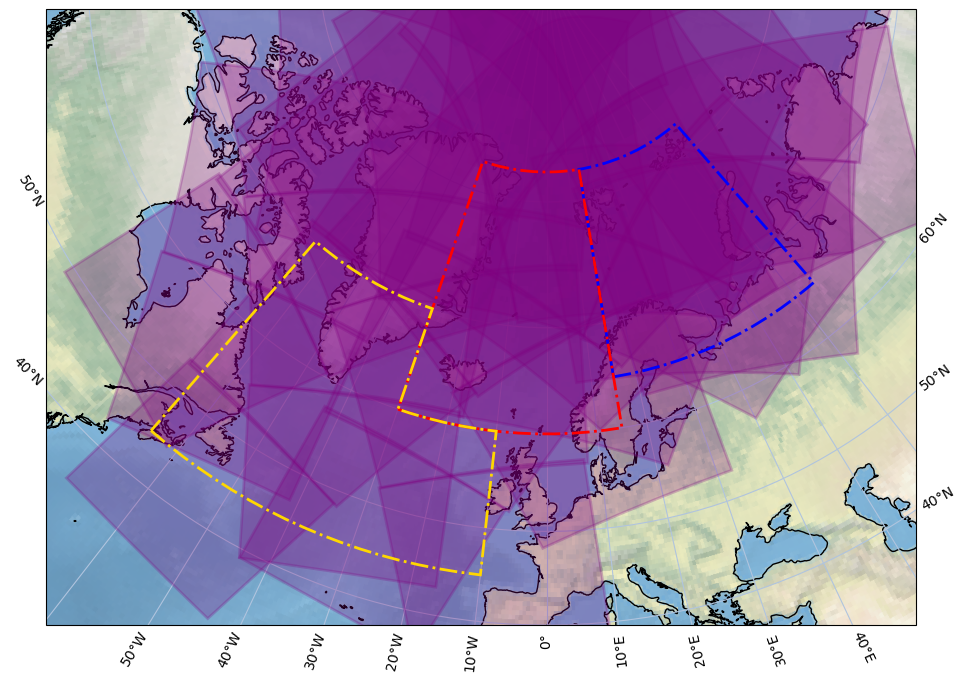

In [29]:
fig = plt.figure(figsize=[12,8])

map_proj = ccrs.LambertConformal(central_longitude=0)
map_proj._threshold /= 100

ax = plt.axes(projection=map_proj)
ax.set_extent([-80,55,40,89], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

gl = ax.gridlines(draw_labels=True, color = 'lightsteelblue',  xlocs = [x for x in range(-60,70,10)], \
                  ylocs = [y for y in range(40,90,10)], x_inline=False, y_inline=False, zorder=1)
gl.top_labels = False

for polygon in polygons:
    polygon = polygon.split()
    polygon = [float(x) for x in polygon]
    polygon = [(polygon[i+1], polygon[i]) for i in range(0, len(polygon), 2)] # need to swap lat/lon

    polygon_patch = patches.Polygon(xy=polygon, edgecolor='purple', facecolor='purple', alpha=0.25,
                                linewidth=2, transform=ccrs.Geodetic(), zorder=2) # ? Projection
    ax.add_patch(polygon_patch)


# Barents Sea subregion
barents_box = patches.Polygon(xy=barents_corners, edgecolor='blue', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=3)
ax.add_patch(barents_box)

# Greenland-Iceland-Norwegian Seas subregion
gin_box = patches.Polygon(xy=gin_corners, edgecolor='red', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=4)
ax.add_patch(gin_box)

# Labrador Sea subregion
labrador_box = patches.Polygon(xy=labrador_corners, edgecolor='gold', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(labrador_box)
